## Magic from here onwards, do not touch

In [2]:
%load_ext autoreload
%autoreload 2

In [30]:
import math
import wandb
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm

matplotlib.rc('font', **{'size': 16})

In [110]:
api = wandb.Api()
sweep = api.sweep("ko3n1g/equivariant-attention/t1u6qh1s")
sweep_data = []
for run in tqdm(sweep.runs):
    history = run.history()
    df = history.dropna(subset=['Test loss'], axis=0)
    break

/Users/ko3nig/Dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [111]:
df

,_step,_runtime,Train Batch Loss,_timestamp,Test vel_mse,lr,Linear BL vel_mse,Test loss,Test pos_mse,Train Epoch Loss,Linear BL pos_mse,Const. BL pos_mse
10,209,5893,0.711111,1624634740,0.922343,0.000999,1.843157,0.727669,0.532996,0.726480,1.860775,0.902842
11,266,7490,0.736715,1624636337,0.922181,0.000998,1.843157,0.725744,0.529307,0.723078,1.860775,0.902842
56,912,25596,0.717632,1624654443,0.921502,0.000980,1.843157,0.708612,0.495721,0.708059,1.860775,0.902842
86,1368,38376,0.695727,1624667223,0.921258,0.000955,1.843157,0.705949,0.490640,0.704678,1.860775,0.902842
113,1786,50043,0.677384,1624678890,0.921179,0.000924,1.843157,0.704844,0.488509,0.703024,1.860775,0.902842
124,2033,56889,0.706006,1624685736,0.921130,0.000902,1.843157,0.704306,0.487481,0.702774,1.860775,0.902842
165,2755,76928,0.694656,1624705775,0.921156,0.000826,1.843157,0.702815,0.484474,0.701985,1.860775,0.902842
186,3173,88560,0.700986,1624717407,0.921297,0.000774,1.843157,0.703326,0.485355,0.701455,1.860775,0.902842
203,3591,100208,0.711211,1624729055,0.921146,0.000718,1.843157,0.701813,0.482479,0.700942,1.860775,0.902842
242,4332,120886,0.690563,1624749733,0.921184,0.000612,1.843157,0.701990,0.482796,0.699951,1.860775,0.902842


In [88]:
df = pd.DataFrame(sweep_data)

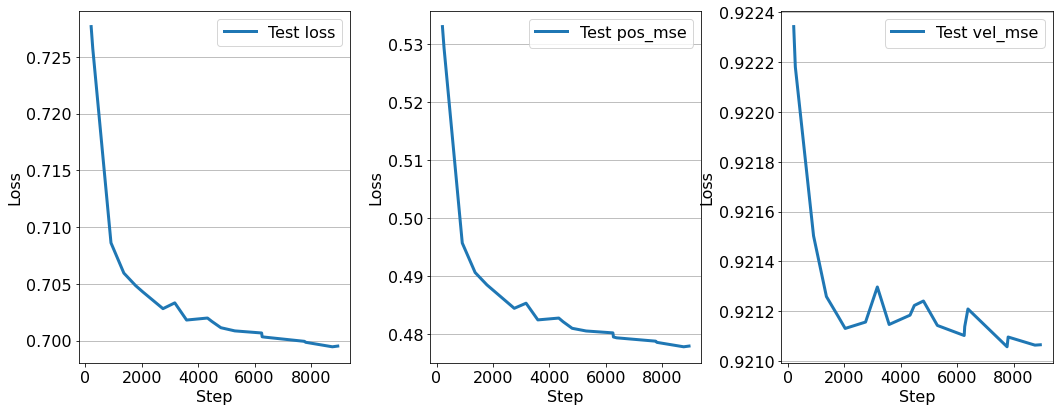

In [114]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
plt.plot(df["_step"], df['Test loss'], linewidth=3, label='Test loss')

plt.tight_layout()
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Step')
plt.grid(b=True, which='major', axis='y')

plt.subplot(1, 3, 2)
plt.plot(df["_step"], df['Test pos_mse'], linewidth=3, label='Test pos_mse')

plt.tight_layout()
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Step')
plt.grid(b=True, which='major', axis='y')

plt.subplot(1, 3, 3)
plt.plot(df["_step"], df['Test vel_mse'], linewidth=3, label='Test vel_mse')
plt.tight_layout()
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Step')
plt.grid(b=True, which='major', axis='y')


plt.savefig(f'Final model vs epoch.pdf', bbox_inches='tight')
plt.savefig(f'Final model vs epoch.png', bbox_inches='tight')
plt.show()